# Задания

### Модули

In [85]:
import matplotlib.pyplot as plt
import random
import sympy as smp
import numpy as np
import math
from ecpy.curves import Curve, Point

## <font color='red'>Задание 1.</font>
Изобразить эллиптические кривые:
- с $\;D>0$;  

- с $\;D<0$;

- с самопересечением;

- с каспом.  

### Решение

Коэффициенты и дискриминант:

In [86]:
a = -1
b = 1
D = 27 * b ** 2 + 4 * a ** 3

$\href{https://ru.stackoverflow.com/questions/741048/%D0%9A%D0%B0%D0%BA-%D0%B2-matplotlib-%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D1%8C-%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA-%D0%BD%D0%B5%D1%8F%D0%B2%D0%BD%D0%BE%D0%B9-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8}{Помог}$ построить график неявной функции.

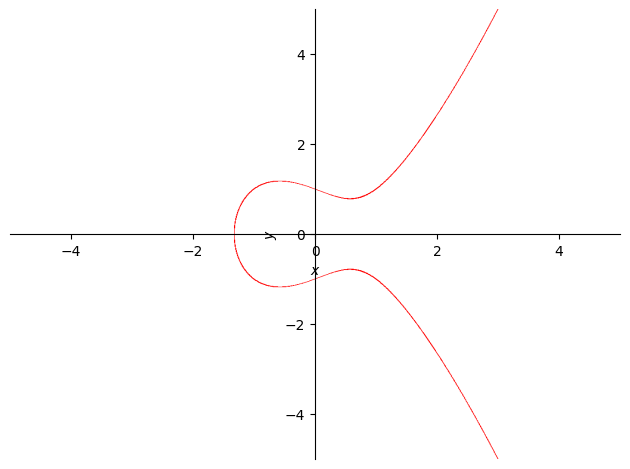

In [87]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

Коэффициенты и дискриминант:

In [88]:
a = -3
b = 2
D = 27 * b ** 2 + 4 * a ** 3

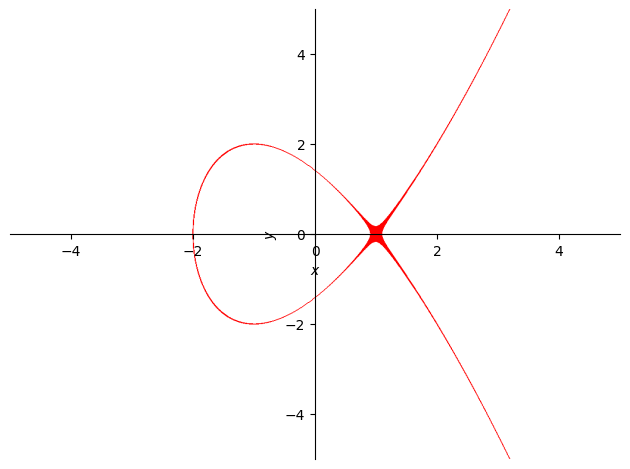

In [89]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

Коэффициенты и дискриминант:

In [90]:
a = -2
b = 1
D = 27 * b ** 2 + 4 * a ** 3

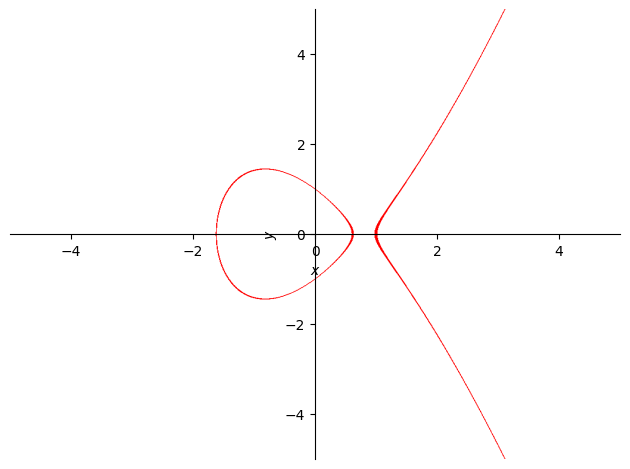

In [91]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

Коэффициенты и дискриминант:

In [92]:
a = 0
b = 0
D = 27 * b ** 2 + 4 * a ** 3

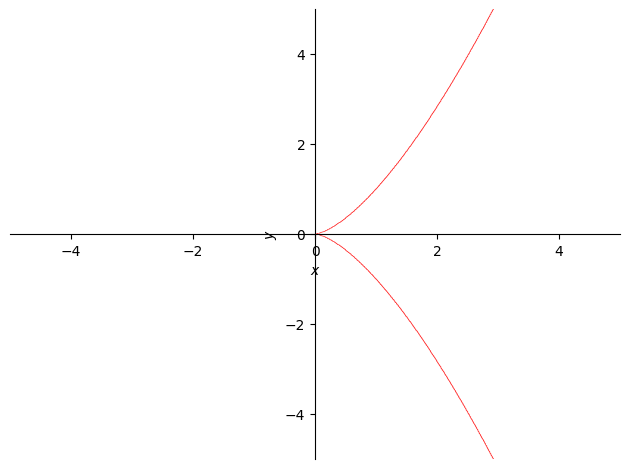

In [93]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

## <font color='red'>Задания 2 - 6.</font>

### <font color='red'>Задание 2.</font>
Реализовать класс `Curve`, который хранит $\;a, b, p\;$ эллиптической кривой
$$
  y^2=x^3+ax+b\mod p.
$$  

### <font color='red'>Задание 3.</font>
Реализовать класс `Point`, объектом которого является точка с координатами $\;(x,y)\;$ кривой `Curve`.

### <font color='red'>Задание 4.</font>
Для класса `Curve` реализовать методы нахождения всех точек кривой при помощи полного перебора и при помощи алгоритма Тонелли-Шенкса. Реализовать метод, который находит порядок кривой. Реализовать метод, который находит случайную точку кривой.

### <font color='red'>Задание 5.</font>
Для класса `Point` реализовать нахождение противоположного элемента, вычитание и сложение точек. Проверить выполнение ассоциативности.

### <font color='red'>Задание 6.</font>
Для класса `Point` реализовать операцию умножения точки на целое число.

### Решение

#### Классы

In [94]:
class My_Curve:
    """docstring"""
    
    def __init__(self, a, b, p):
        self.__a = a
        self.__b = b
        self.__p = p
        
    def getCoeffs(self):
        return self.__a, self.__b
    
    def getMod(self):
        return self.__p
    
    def getPoints(self):
        X = [(x ** 3 + self.__a * x + self.__b) % self.__p for x in range(self.__p)]
        Y = [y ** 2 % self.__p for y in range(self.__p)]
        points = []
        for i in range(len(X)):
            for j in range(len(Y)):
                if(X[i] == Y[j]):
                    points += [[i, j]]
        points = [My_Point(pt[0], pt[1], self) for pt in points]
        return points
    
    def getShanksPoints(self):
        points = []
        for x in range(self.__p):
            a = (pow(x, 3, p) + self.__a * x + self.__b) % self.__p
            if not Jacobi(a, self.__p) == 1:
                continue
            y = Shanks(a, self.__p)
            temp_point1 = My_Point(x, y, self)
            points += [temp_point1]
        return points
    
    def getRandomPoint(self):
        x = random.randint(0, self.__p)
        a = x ** 3 + self.__a * x + self.__b
        points = []
        while not Jacobi(a, self.__p) == 1:
            x = random.randint(0, self.__p)
            a = x ** 3 + self.__a * x + self.__b
        y = Shanks(a, self.__p)
        temp_point1 = My_Point(x, math.sqrt(y), self)
        temp_point2 = My_Point(x, -math.sqrt(y), self)
        points += [temp_point1, temp_point2]
        return points[random.randint(0, 1)]
    
    def getOrder(self):
        return len(self.getShanksPoints())
    
    def __repr__(self):
        return 'y^2 = x^3 + ({0}) * x + ({1}) mod {2}'.format(self.__a, self.__b, self.__p)

In [189]:
class My_Point():
    """docstring"""    
    
    def __init__(self, x, y, curve):
        self.__x = x
        self.__y = y
        self.__curve = curve
        
    def getX(self):
        return self.__x
    
    def getY(self):
        return self.__y
    
    def getCurve(self):
        return curve
    
    def __repr__(self):
        return '({0}, {1})'.format(self.__x, self.__y)
    
    def getInversePoint(self):
        return My_Point(self.__x, -1 * self.__y, self.__curve)
    
    def __add__(self, other):
        a, b = self.__curve.getCoeffs()
        x1 = self.__x
        y1 = self.__y
        x2 = other.getX()
        y2 = other.getY()
        if (x1 == 0 and y1 == 0):
            return other
        elif(x2 == 0 and y2 == 0):
            return self
        if (x1 != x2):
            k = (y2 - y1) * pow((x2 - x1), -1, self.__curve.getMod()) % self.__curve.getMod()
            x3 = pow(k, 2, self.__curve.getMod()) - x1 - x2
            y3 = k * (x1 - x3) % self.__curve.getMod() - y1
        elif (x1 == x2 and y1 == y2 and y1 != 0):
            k = (3 * pow(x1, 2, self.__curve.getMod()) % self.__curve.getMod() + a) * pow(2 * y1, -1, self.__curve.getMod()) % self.__curve.getMod()
            x3 = pow(k, 2, self.__curve.getMod()) - 2 * x1 % self.__curve.getMod()
            y3 = k * (x1 - x3) % self.__curve.getMod() - y1
        elif (x1 == x2 and y1 == y2 and y1 == 0):
            x3 = 0
            y3 = 0
        elif (x1 == x2 and y1 != y2):
            x3 = 0
            y3 = 0
        return My_Point(x3, y3, self.__curve)
        
    def __sub__(self, other):
        if isinstance(other, My_Point):
            return self + other.getInversePoint()
        
    def __mul__(self, other):
        result = My_Point(0, 0, self.__curve)
        Q = My_Point(self.__x, self.__y, self.__curve)
        m = bin(other)[2:]
        for i in range(len(m)):
            if (m[i] == '1'):
                result = result + Q
            Q = Q + Q
        return result
    
    

#### Вспомогательные функции

In [178]:
def st(n):
    s = 0
    t = n
    while t % 2 == 0:
        s += 1
        t = t // 2
    return s, t

def Jacobi(a,n):
    if n < 0 or not n % 2:
        raise ValueError("n should be an odd positive integer") 
    j = 1
    if n == 1:
        return j
    if a<0:
        a = -a
        if n%4 == 3:
            j = -j
    while n>1:
        if a == 0:
            return 0
        s,t = st(a)
        if (s%2 == 1) & (n%8 in [3, 5]):
            j = -j
        if 3 == n%4 == t%4:
            j = -j
        a = n%t
        n = t
    return j

def Shanks(a, p):
    if not Jacobi(a, p) == 1:
        raise ValueError("a should be a quadratic residue")
    s, t = st(p-1)
    import random
    n = random.randint(2, p - 2)
    while Jacobi(n, p) == 1:
        n = random.randint(2, p - 2)
    b = pow(n, t, p)
    r = pow(int(a), (t+1)//2, p)
    d = 0
    f = pow(int(a), t, p)
    b2 = b
    for i in range(1,s):
        b2 = b2 * b2 % p
        if not pow(f, 2 ** (s - 1 - i), p) == 1:
            d += 2 ** i
            f = f * b2 % p 
    return r*pow(b, d//2, p) % p

#### Проверка точек

In [190]:
curve1 = My_Curve(-1, 1, 13)

In [191]:
point1 = My_Point(4, 3, curve1)
point1

(4, 3)

In [192]:
point1.getInversePoint()

(4, -3)

In [193]:
point2 = My_Point(1, 1, curve1)
point3 = point1 + point2

In [194]:
point3

(7, 8)

In [195]:
My_Point(4, 10, curve1) + My_Point(4, 3, curve1)

(0, 0)

In [196]:
point1 - point2

(4, -3)

In [203]:
point1 * 4

(4, 3)

#### Проверка ассоциативности

In [226]:
P = My_Point(12, 1, curve1)
Q = My_Point(3, 8, curve1)
R = My_Point(7, 8, curve1)
print(P, Q, R)

(12, 1) (3, 8) (7, 8)


In [227]:
(P + Q)

(-3, 9)

In [222]:
P + (Q + R)

(7, 14)

In [223]:
((P + Q) + R) == (P + (Q + R))

False

#### Из библиотеки

In [128]:
# help(Curve);

#### Проверка кривых

In [229]:
pts = curve1.getShanksPoints()

In [230]:
for pt in pts:
    print(pt)
    
X = [pt.getX() for pt in pts]
Y = [pt.getY() for pt in pts]

(0, 1)
(1, 1)
(4, 2)
(9, 8)
(10, 9)
(11, 2)


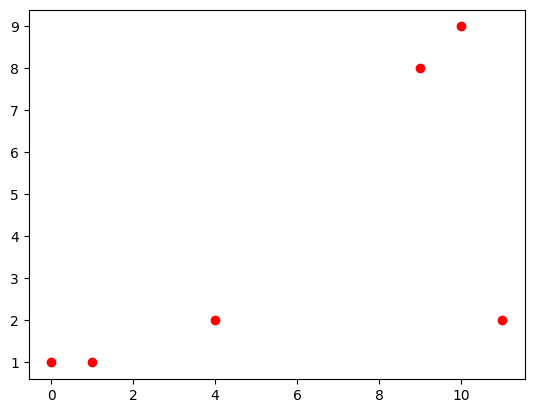

In [231]:
plt.plot(X, Y, 'ro')

In [238]:
curve1.getRandomPoint()

(7, 2.8284271247461903)

In [233]:
curve1.getOrder()

6

In [234]:
curve1.getPoints()

[(0, 1),
 (0, 12),
 (1, 1),
 (1, 12),
 (3, 5),
 (3, 8),
 (4, 3),
 (4, 10),
 (5, 2),
 (5, 11),
 (6, 4),
 (6, 9),
 (7, 5),
 (7, 8),
 (10, 4),
 (10, 9),
 (12, 1),
 (12, 12)]

In [235]:
curve2 = My_Curve(4, 20, 59)

In [236]:
curve2.getShanksPoints()

[(0, 16),
 (1, 5),
 (2, 53),
 (5, 46),
 (6, 46),
 (7, 7),
 (9, 57),
 (12, 26),
 (13, 5),
 (14, 5),
 (16, 53),
 (18, 46),
 (21, 17),
 (22, 36),
 (23, 1),
 (24, 3),
 (25, 3),
 (26, 19),
 (27, 21),
 (28, 27),
 (35, 17),
 (36, 36),
 (37, 3),
 (41, 29),
 (43, 12),
 (44, 12),
 (46, 35),
 (55, 29),
 (56, 12),
 (57, 22),
 (58, 28)]

In [67]:
pts21 = curve2.getPoints()

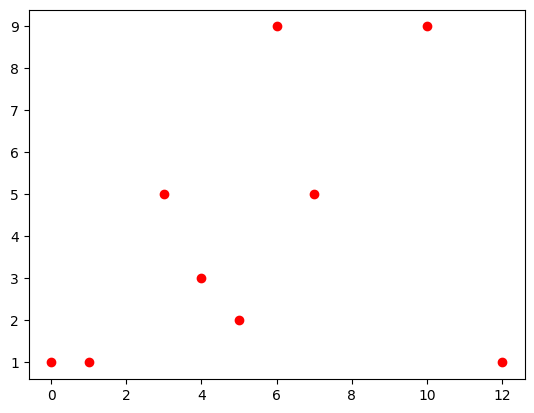

In [68]:
X1 = [pt.getX() for pt in pts21]
Y1 = [pt.getY() for pt in pts21]
plt.plot(X, Y, 'ro')

In [69]:
pts22 = curve2.getShanksPoints()

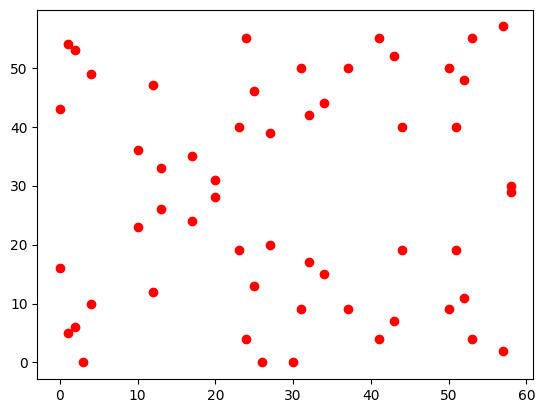

In [70]:
X2 = [pt.getX() for pt in pts22]
Y2 = [pt.getY() for pt in pts22]
plt.plot(X1, Y1, 'ro')

## <font color='red'>Задание 7.</font>
Найти циклическую и нециклическую группы точек эллиптической кривой с составным порядком. Найти группу точек эллиптической кривой с простым порядком. Является ли она циклической?

### Решение

In [34]:
curve3 = Curve(1, 3, 13)

In [35]:
pts3 = curve3.getPoints()

In [36]:
pts3

[(0, 4),
 (0, 9),
 (2, 0),
 (5, 4),
 (5, 9),
 (6, 2),
 (6, 11),
 (8, 4),
 (8, 9),
 (9, 0),
 (10, 5),
 (10, 8),
 (12, 1),
 (12, 12)]

In [37]:
res_pt = pts3[2]
O = Point(math.inf, math.inf, curve3)
n = 1

In [38]:
while (res_pt.getX() != math.inf and res_pt.getY() != math.inf):
    res_pt = res_pt + pts3[2]
    n += 1

In [39]:
n

2

In [41]:
res_pt = pts3[1]
O = Point(math.inf, math.inf, curve3)
n = 1
while ((res_pt.getX() != math.inf and res_pt.getY() != math.inf) or (res_pt.getX() != math.nan and res_pt.getY() != math.nan)):
    res_pt = pts3[1] * n
    n += 1

OverflowError: (34, 'Result too large')